<a href="https://colab.research.google.com/github/apoyezzhayev/Interactive-Statistics-Notebooks/blob/i3_chi_squared_dist/l4_chi_squared_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
import seaborn as sns

from scipy.stats import gamma, norm, chi2, expon

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Define utility functions

def _plot_distr(distributions: dict, xlim=None, ylim=None):
    """
    Compares multiple distributions and plots their corresponding PDF and CDF
    Params:
    distributions - {name: (scipy.stats.rv_continuous: {kwargs of corresponding distribution})}
    """
    if xlim is None:
        x = np.linspace(
            min([dist.ppf(0.01, **kwargs) for dist, kwargs in distributions.values()]),
            max([dist.ppf(0.99, **kwargs) for dist, kwargs in distributions.values()]),
            num=100,
        )
    else:
        x = np.linspace(xlim[0], xlim[1], num=100)

    pdfs, cdfs, names = zip(
        *[
            (dist.pdf(x, **kwargs), dist.cdf(x, **kwargs), name)
            for name, (dist, kwargs) in distributions.items()
        ]
    )

    pdf_data = pd.DataFrame(np.stack(pdfs, axis=-1), index=x, columns=names)

    cdf_data = pd.DataFrame(np.stack(cdfs, axis=-1), index=x, columns=names)

    f = plt.figure(figsize=(16, 8))
    gs = f.add_gridspec(1, 2)

    pdf_ax = f.add_subplot(gs[0, 0])
    pdf_ax.set_title("PDF")
    if ylim is not None:
        pdf_ax.set_ylim(ylim)
    sns.lineplot(data=pdf_data)

    cdf_ax = f.add_subplot(gs[0, 1])
    cdf_ax.set_title("CDF")
    sns.lineplot(data=cdf_data)
    f.tight_layout()

In [0]:
sns.set(style="darkgrid")

# Chi-squared distribution

## Definition

If $x_1,...,x_k$ have **independent, standard normal** distributions ($X\sim N(0, 1) $), then $$w=\sum_{i=1}^kx_i^2 \tag{1}$$ is distributed as $\chi^2$ with $k$ degrees of freedom: $w\sim\chi^2(k)$ or $w\sim\chi^2_k$. The $\chi^2$ is a parametric distribution with one-parameter: $k$ - number of degrees of freedom
 
 **Questions:**
 1. If $X\sim N(\mu, \sigma)$ and $z={\frac{(x-\mu)}{\sigma}}$ then which distribution has $z^2$?
 2. Is there any difference between sampling random samples from the same $N$ distribution or taking independent random variables from the N distributions with the same parameters?

It's interesting that a $\chi^2$ distribution is a **special case of $\Gamma$ distribution** with $\theta\equiv2$ and $\alpha\equiv k/2$, where $k$.

***
### PDF & CDF

**PDF**:
$$f(x;k)\equiv\Gamma(\frac{k}{2},2)=
\begin{cases}
    {\dfrac 
        {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;
        \\0,&{\text{otherwise}}.
\end{cases}\tag{2}$$
$\Gamma(\alpha, \theta)$ - gamma-distribution and $\Gamma(\alpha)$ - gamma-function.

**CDF**:
$$F(x;k)={\frac {\gamma \left({k \over 2},{x \over 2}\right)}{\Gamma \left({k \over 2}\right)}}\tag{3}$$
$\Gamma(\alpha)$ - complete gamma-function and $\gamma(\alpha, \theta)$ - lower incomplete gamma-function.

In [19]:
@interact(
    k=widgets.SelectMultiple(
        options=[1, 2, 3, 4, 6, 9], value=[1, 3, 6], description="k", disabled=False
    )
)
def chi2_different_params(k):
    _plot_distr({"k=%d" % i: (chi2, {"df": i}) for i in k}, xlim=(0, 16), ylim=(0, 0.5))

interactive(children=(SelectMultiple(description='k', index=(0, 2, 4), options=(1, 2, 3, 4, 6, 9), value=(1, 3…

***
### Motivation

Unlike more widely known distributions such as the normal distribution, the chi-square distribution is not as often applied in the direct modeling of natural phenomena. 

**So why do we need it?**

$\chi^2$ is very important and common distribution, it is used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal. It arises in different hypothesis tests. It is also a component of the definition of the t-distribution and the F-distribution used in t-tests, analysis of variance, and regression analysis.

The primary reason that the chi-square distribution is used extensively in hypothesis testing is its relationship to the normal distribution. Many hypothesis tests use a test statistic, such as the t-statistic in a t-test. For these hypothesis tests, as the sample size, n, increases, the sampling distribution of the test statistic approaches the normal distribution (central limit theorem). Because the test statistic (such as t) is asymptotically normally distributed, provided the sample size is sufficiently large, the distribution used for hypothesis testing may be approximated by a normal distribution. Testing hypotheses using a normal distribution is well understood and relatively easy. The simplest chi-square distribution is the square of a standard normal distribution. So wherever a normal distribution could be used for a hypothesis test, a chi-square distribution could be used.


## Properties

### Additivity

The sum of **independent chi-square** variables is also chi-square distributed. 

If all $Y_i \sim \chi^2(k_i)$ are mutually independent then $Y_1+...+Y_i = Y \sim \chi^2(k_1+...+k_i))$


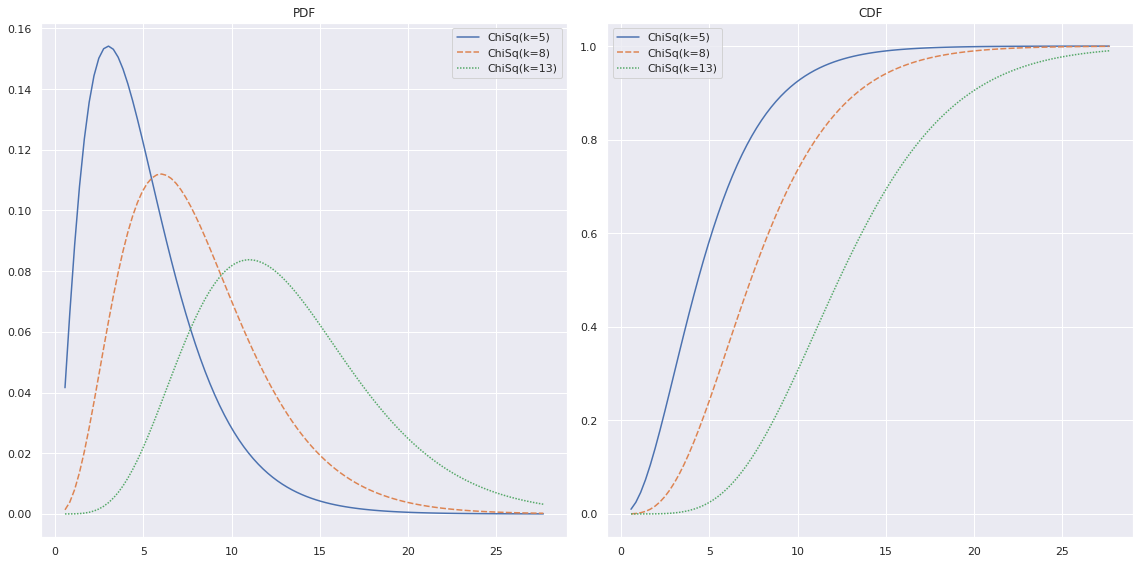

In [20]:
_plot_distr({"ChiSq(k=%d)" % i: (chi2, {"df": i}) for i in [5, 8, 13]})

**Questions:**
1. What are the mean and std of the distributions above?
2. Why the green graph doesn't look like a sum of two other? What graph it should be better to use?
3. Does the property of additivity works for any variables from $\chi^2$?

### Moments of the distribution

Moments of $\chi^2$. For $X \sim\chi^2$:
- $E[X]=k$
- $D[X]=2k$

**Questions:**
1. When could we approximate $\chi^2$ by Normal distribution and why?
2. What are the params of the approx $N(\mu, \sigma)$?

### Distribution of sample variance

If $X \sim N(\mu, \sigma^2)$ and $X_1, X_2, ... , X_n$ is a random samples
from the population $X$, then $$\frac{(n-1)S^2_{n-1}}{\sigma^2}\sim\chi^2(n-1)\tag{4}$$

$S^2_{n-1}=\frac{1}{n-1}\sum_{i=1}^n(X_i - X_i)^2$ - the best estimator of the population variance from sample.

It connects Normal and $\chi^2$ distributions

## Connection with other distributions

There are a list of most common distributions, however ,any other distributions are out of consideration:
- F-distribution: just a ratio of two independent $\chi^2$ random variables
- Normal distribution: 
    - $\chi^2$ is a sum of squared independent standard normal variables
    - $\lim_{n\to\infty}\chi^2(k)\approx N(k; 2k)$ 
- Gamma distribution: $\chi^2(k)\equiv\Gamma(\theta=2;\alpha=k/2)$
- Exponential distribution: $\chi^2(2)\equiv Exp(\lambda=1/2)$

Graph of how the $\chi^2$ is related to other distributions:
![from wiki](https://upload.wikimedia.org/wikipedia/commons/6/69/Relationships_among_some_of_univariate_probability_distributions.jpg)

## Applications

The $\chi^2$ distribution has many applications in statistics, the most common are:
1. ["$\chi^2$ Test for Normality"](href_to_notebook_with_chi2_tests): allows us to check whether a sample follows an approximately normal distribution.
2. ["$\chi^2$ goodness of fit test" (GoF)](href_to_notebook_with_chi2_tests): allows us to check whether the population distribution of the variable is the same as the hypothetical distribution. Suboptions:
    - Tests of deviations of differences between expected and observed frequencies.
3. ["The Chi-Square test of independence"](https://www.statisticssolutions.com/non-parametric-analysis-chi-square/): used to determine if there is a significant relationship between two nominal (categorical) variables 
4. Sample variance study when the underlying distribution is normal: $\chi^2$ is a distribution of sample variances (property 1.2.3).
    - Confidence interval estimation for a population standard deviation of a normal distribution from a sample standard deviation (naturally inferred from 3)
5. [Likelihood-ratio test for nested models](https://www.statisticshowto.com/likelihood-ratio-tests/): help to choose the best model between 2 nested models. Nested means that one model is a special case of another.
6. Log-rank test in survival analysis: hypothesis test to compare the survival distributions of two samples.

# Exercises

In [0]:
def _plot_norm_and_chi(k, mu, sigma, **kwargs):
    _plot_distr(
        {"chi2": (chi2, {"df": k}), "norm": (norm, {"loc": mu, "scale": sigma})},
        **kwargs
    )


def _plot_gamma_and_chi(k_chi, k_gamma, theta, **kwargs):
    _plot_distr(
        {
            "chi2": (chi2, {"df": k_chi}),
            "gamma": (gamma, {"a": k_gamma, "loc": 0, "scale": theta}),
        },
        **kwargs
    )

## Play with distributions

### Sampling
Play with sampling different number of items and with different number of degrees of freedom.

In [22]:
@interact
def _show_distribution(df=[1, 5, 10, 100, 1000], N=[10, 100, 10000]):
    data_chi2 = chi2.rvs(df, size=N)
    ax = sns.distplot(data_chi2, kde=False, color="skyblue", fit=chi2)
    ax.set(xlabel="ChiSq Distribution", ylabel="Frequency")

interactive(children=(Dropdown(description='df', options=(1, 5, 10, 100, 1000), value=1), Dropdown(description…

1. What is $df$ in case of $\chi^2$ and how does it depends on number of samples?

### Central Limit Theorem
Let's see for wich degrees of freedom chi_sqaured distribution reaches the Normal distribution

In [23]:
@interact(
    k=widgets.FloatLogSlider(
        value=2, base=2, min=0, max=10, step=0.2, readout_format=".0f"
    )
)
def align_norm_and_chi(k):
    df = np.round(k)
    _plot_norm_and_chi(df, df, np.sqrt(2 * df))

interactive(children=(FloatLogSlider(value=2.0, base=2.0, description='k', max=10.0, readout_format='.0f', ste…

For $k>50$ the distribution is sufficiently close to a normal distribution for the difference to be ignored.

## Match distributions

### Normal
Find params of $\chi^2(k)$ and $N(\mu, \sigma)$ for which the distributions approximately mathches

In [24]:
@interact
def find_correct_params_chi_norm(k="1", mu="1", sigma="1"):
    _plot_norm_and_chi(int(k), float(mu), float(sigma))

interactive(children=(Text(value='1', description='k'), Text(value='1', description='mu'), Text(value='1', des…

1. Why the value of y in PDF is more than 1.0?
2. Why PDF of $\chi^2$ always > 0

### Gamma

Find parameters of $\Gamma(\alpha, \theta)\equiv\chi^2(k)$ for $k=20$. Both lines must match

In [25]:
@interact(k=fixed(20))
def find_correct_params_chi_norm(k, alpha="1", theta="1"):
    _plot_distr(
        {
            "chi2 (k=20)": (chi2, {"df": k}),
            "gamma": (gamma, {"a": float(alpha), "loc": 0, "scale": float(theta)}),
        },
    )

interactive(children=(Text(value='1', description='alpha'), Text(value='1', description='theta'), Output()), _…

### Exponential

Find paramteres of exponential distribution Exp(k)

In [26]:
@interact(
    k=widgets.IntText(value=1, min=1, max=100),
    exp_lambda=widgets.FloatText(value=2.5, min=0.0, max=100),
)
def find_correct_params_chi_norm(k, exp_lambda):
    _plot_distr(
        {
            "chi2(k=%d)" % k: (chi2, {"df": k}),
            "exp": (expon, {"scale": 1 / float(exp_lambda)}),
        },
    )

interactive(children=(IntText(value=1, description='k'), FloatText(value=2.5, description='exp_lambda'), Outpu…

## Building distribution

### Build $\chi^2$ distribution
1. Generate sample of $x\sim N(\mu=2, \sigma=4)$ with 10000 points.
2. Build sample distribution of $z^2$, where $z$ is a standardized normally distributed random value

In [0]:
# TODO: Change params of generation to sample from the distribution in the task
x = norm.rvs(size=10000)

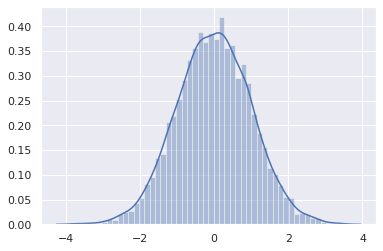

In [28]:
sns.distplot(x, kde=True)

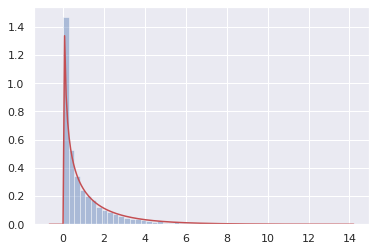

In [29]:
# TODO: Get Z (standard normal)

# TODO: Make Z^2

# TODO: Find the sample distribution of Z^2

# It should be close to the given below
sns.distplot(chi2.rvs(1, size=10000), fit=chi2, kde=False, fit_kws={"color": "r"})

- What is an expected value of the $z^2$?
- How much degrees of freedom has this distribtuion?
- Provide examples of such variables from real life

### Multiple $x_i\sim N$

Generate $\chi^2$ with df=10 by sampling from N

<details>
    <summary>Hint</summary>
    <li>Sample multiple times from Normal distribution with the same parameters</li>
</details>

In [0]:
# TODO: generate a sample of new random variable (with df=10)

### Additivity of $\chi^2$
Plot a distribution of random variable resulted from summation of random variables generated on 2 previous steps ($\chi^2_{k=1}$ and $\chi^2_{k=10}$)

### Find distribution of sample variance

Build an experiment to prove that property of *sample variance distribution* holds. Shown in (4) from section 1.2.3.

Generate $n$ samples from normal distribution with some params and exemine the properties of $S^2/\sigma^2$.

<details>
    <summary>Hint</summary>
    <li>Use small sample size during sampling from N to clearly observe the skewness of $\chi^2$ distribution</li>
    <li>Use big number of simulations (samplings) to get smooth $\chi^2$ distribution</li>
</details>

In [0]:
# TODO: write the experiment's code

In [0]:
# Distribution of sample variance divided by population variance should be chi2

## Scipy questions

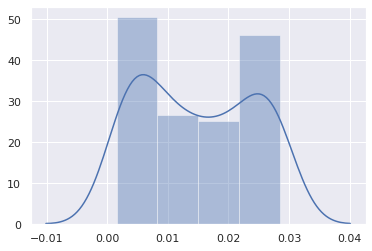

In [33]:
k = 100
x = np.linspace(chi2.ppf(0.01, df=k), chi2.ppf(0.99, df=k), num=100,)
sns.distplot(chi2.pdf(x, df=k))

1. Why it does not resembles pdf of Chi-squared?
2. What is `ppf`? Why do we need to use it?

# Conclusion

- $\chi^2$ is a random variable distribution with one parameter $k$ = *degrees of freedom*. By definition it is a sum of squares of normally distributes random variables.
- Despite the fact that it is rarely used for direct modelling of natural values it is closely related to many other distributions and statistical test
- The most popular tests based on properties of $\chi^2$ distribution (will be discussed in following lessons):
  - Pearson's goodness of fit test
  - Test for normality
  - Test for independence